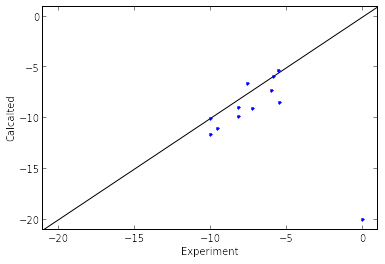

In [74]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#x = np.array([-2.0, -2.1, -2.2, -2.3, -2.4, -2.5, -2.6, -2.7, -2.8, -2.9, -3.0, -3.1])
x = 5*np.random.rand(12) - 10

### Scenario 1, the statistical error changes metric values
#y = 1.0*x - 0.5

### Scenario 2
y = np.random.normal(x,1.0) - 1.0
x[1] = 0
y[1] = -20

min = np.amin(np.array([np.amin(x),np.amin(y)]))-1
max = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.axis([min, max, min, max])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([min, max], [min,max], 'k-');
plt.plot(x, y, 'b.');


       Slope   -0.59  (  0.00)
      Interc  -13.66  (  0.00)
           R   -0.42  (  0.00)
         R^2    0.18  (  0.00)
        RMSE    5.95  (  0.00)
         MSE   -2.59  (  0.00)
         MUE    2.78  (  0.00)
         TAU    0.39  (  0.00)


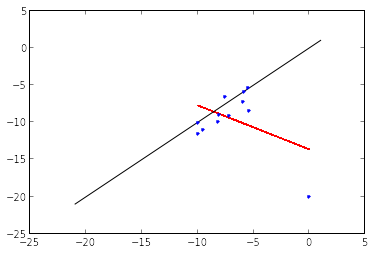

In [75]:
BootCyc=1000
R = np.zeros([BootCyc], np.float64)
R2 = np.zeros([BootCyc], np.float64)
RMSE = np.zeros([BootCyc], np.float64)
MSE = np.zeros([BootCyc], np.float64)
MUE = np.zeros([BootCyc], np.float64)
Slp = np.zeros([BootCyc], np.float64)
Int = np.zeros([BootCyc], np.float64)
Tau = np.zeros([BootCyc], np.float64)
MetricNames = ('Slope', 'Interc', 'R', 'R^2', 'RMSE', 'MSE', 'MUE', 'TAU')
SampleTypes = ('NoUWoutRep', 'LgUWoutRep', 'NoUWRep', 'LgUWRep')
MetricVals = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MetricErrs = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MTmp = np.zeros([len(MetricNames),BootCyc], np.float64)
xtmp = np.zeros([len(x)], np.float64)
ytmp = np.zeros([len(x)], np.float64)
yfit = np.zeros([len(x)], np.float64)
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 0
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])





       Slope   -0.59  (  0.21)
      Interc  -13.62  (  1.59)
           R   -0.37  (  0.13)
         R^2    0.16  (  0.10)
        RMSE    6.25  (  0.56)
         MSE   -2.60  (  0.56)
         MUE    3.51  (  0.43)
         TAU    0.19  (  0.13)


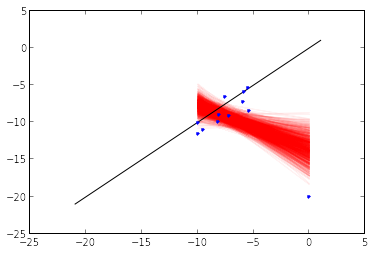

In [76]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 1
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])



       Slope   -0.18  (  0.89)
      Interc  -10.30  (  6.95)
           R   -0.07  (  0.68)
         R^2    0.46  (  0.24)
        RMSE    5.10  (  2.96)
         MSE   -2.57  (  1.53)
         MUE    2.75  (  1.50)
         TAU    0.37  (  0.25)


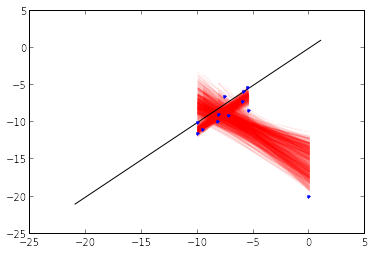

In [77]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 2
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])


       Slope   -0.21  (  0.95)
      Interc  -10.48  (  7.45)
           R   -0.15  (  0.56)
         R^2    0.34  (  0.20)
        RMSE    5.74  (  2.73)
         MSE   -2.64  (  1.68)
         MUE    3.56  (  1.54)
         TAU    0.16  (  0.26)


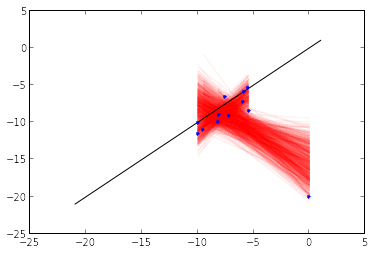

In [78]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);


SampleType = 3
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05,  zorder=1)
    

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])

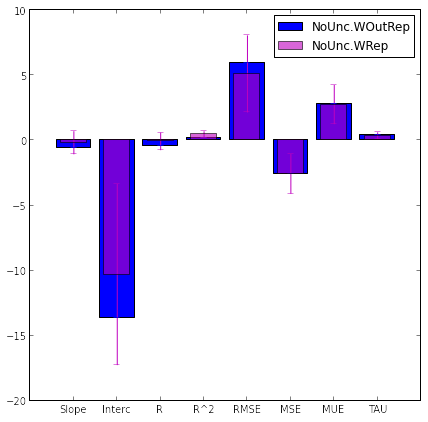

Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep
       Slope  -0.59  (  0.00)     -0.59  (  0.21)     -0.18  (  0.89)     -0.21  (  0.95)    
      Interc -13.66  (  0.00)    -13.62  (  1.59)    -10.30  (  6.95)    -10.48  (  7.45)    
           R  -0.42  (  0.00)     -0.37  (  0.13)     -0.07  (  0.68)     -0.15  (  0.56)    
         R^2   0.18  (  0.00)      0.16  (  0.10)      0.46  (  0.24)      0.34  (  0.20)    
        RMSE   5.95  (  0.00)      6.25  (  0.56)      5.10  (  2.96)      5.74  (  2.73)    
         MSE  -2.59  (  0.00)     -2.60  (  0.56)     -2.57  (  1.53)     -2.64  (  1.68)    
         MUE   2.78  (  0.00)      3.51  (  0.43)      2.75  (  1.50)      3.56  (  1.54)    
         TAU   0.39  (  0.00)      0.19  (  0.13)      0.37  (  0.25)      0.16  (  0.26)    


In [79]:
plt.figure(figsize=(7,7))
xpos = np.arange(len(MetricNames))
plt.bar(xpos, MetricVals[0], yerr=MetricErrs[0], color='b', ecolor='b', 
        align='center', alpha=1.0, zorder=1, width=0.8, label='NoUnc.WOutRep')
#plt.bar(xpos, MetricVals[1], yerr=MetricErrs[1], color='c', ecolor='c',
#        align='center', alpha=0.7, zorder=2, width=0.7, label='LgUnc.WOutRep')
plt.bar(xpos, MetricVals[2], yerr=MetricErrs[2], color='m', ecolor='m',
        align='center', alpha=0.6, zorder=3, width=0.6, label='NoUnc.WRep')
#plt.bar(xpos, MetricVals[3], yerr=MetricErrs[3], color='y', ecolor='y',
#        align='center', alpha=0.5, zorder=4, width=0.5, label='LgUnc.WRep')
plt.xticks(xpos, MetricNames)
plt.legend()
plt.show()

print "Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep"
for i in range(len(MetricNames)):
    print "%12s" % MetricNames[i],
    for SampleType in range(len(SampleTypes)):
        print "%6.2f  (%6.2f)   " % (MetricVals[SampleType,i],MetricErrs[SampleType,i]),
    print ''